In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from CCDPApy.helper_func.helper_func import input_path
from CCDPApy.MeasuredData.Perfusion.MeasuredData import MeasuredData
from CCDPApy.BioProcess.Perfusion.BioProcess import BioProcess
from CCDPApy.BioProcess.bioprocess_pipeline import bioprocess_pipeline

pd.set_option('display.max_columns', 200)

In [2]:
cell_culture_method = 'perfusion' # 'fed-batch'
polyorder_file='perfusion_polynomial_order.xlsx'
in_file = 'perfusion_temp.xlsx'
kwargs = {'recycling_factor': 0.25, 'concentration_factor': 3,
          'polyreg': True, 'polyorder_file': polyorder_file}

bio_process = bioprocess_pipeline(cell_culture=cell_culture_method,
                                  input_file_name=in_file,
                                  )
bio_process

Cell Line:            Sample Perfusion
Run ID:               Sample Perfusion 1
Experimenter:         test
Species List:         ['Glc', 'Lac', 'Gln', 'NH3', 'Cell']
Feed List:            ['Glc', 'Gln']
Recycling Factor:     0.25
Concentration Factor: 3

In [17]:
cell = bio_process.get_species('cell')
glc = bio_process.get_species('glucose')
glc.get_cumulative

,value,unit,state
cumulatve concentration,,,
0,-0.000000,(mg/ml),consumed
1,0.276730,(mg/ml),consumed
2,0.742138,(mg/ml),consumed
3,0.959119,(mg/ml),consumed
4,1.235472,(mg/ml),consumed
5,1.603569,(mg/ml),consumed
6,2.345425,(mg/ml),consumed
7,3.536399,(mg/ml),consumed
8,4.328632,(mg/ml),consumed


In [4]:
in_file = 'perfusion_temp.xlsx'
bp = BioProcess(file_name=in_file)
bp.in_process()
bp.polynomial(polyorder_file='perfusion_polynomial_order.xlsx')
bp

Cell Line:            Sample Perfusion
Run ID:               Sample Perfusion 1
Experimenter:         test
Species List:         ['Glc', 'Lac', 'Gln', 'NH3', 'Cell']
Feed List:            ['Glc', 'Gln']
Recycling Factor:     0.25
Concentration Factor: 3

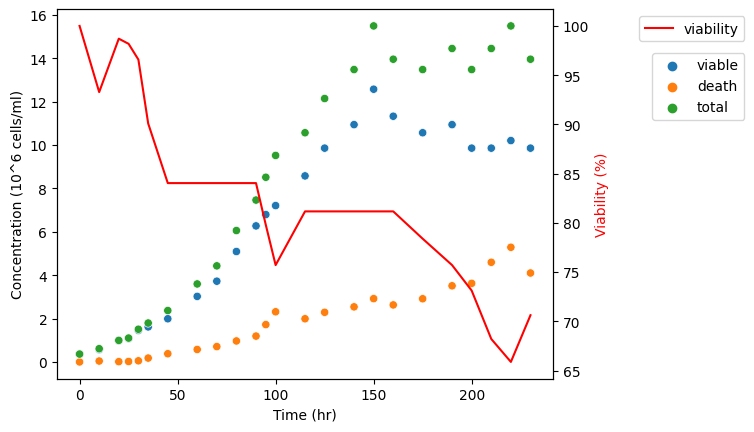

In [5]:
g = bio_process.get_species('cell')
df1 = g.concentration
df2 = g.viability
t = g.get_run_time

# Create scatter plot with Seaborn
fig, ax1 = plt.subplots()
sns.scatterplot(data=df1, x='time', y='value', hue='state', ax=ax1)

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df2, x='time', y='value', ax=ax2, color='r', label='viability')

# Customize the plot
ax1.set_ylabel(f"Concentration {df1['unit'].iat[0]}")
ax2.set_ylabel(f"Viability {df2['unit'].iat[0]}", color='r')
ax1.set_xlabel(f"Time {t['unit'].iat[0]}")
ax1.legend(loc='upper right', bbox_to_anchor=(1.4, 0.9))
ax2.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
plt.show()

In [6]:
df = bio_process.concentration
df.head()

,cellLine,runID,time,value,unit,species
0,Sample Perfusion,Sample Perfusion 1,0.0,3.459119,(mg/ml),glucose
1,Sample Perfusion,Sample Perfusion 1,10.0,3.18239,(mg/ml),glucose
2,Sample Perfusion,Sample Perfusion 1,20.0,2.716981,(mg/ml),glucose
3,Sample Perfusion,Sample Perfusion 1,25.0,2.5,(mg/ml),glucose
4,Sample Perfusion,Sample Perfusion 1,30.0,2.27673,(mg/ml),glucose


In [8]:
df['species'].unique()

array(['glucose', 'lactate', 'glutamine', 'ammonia'], dtype=object)

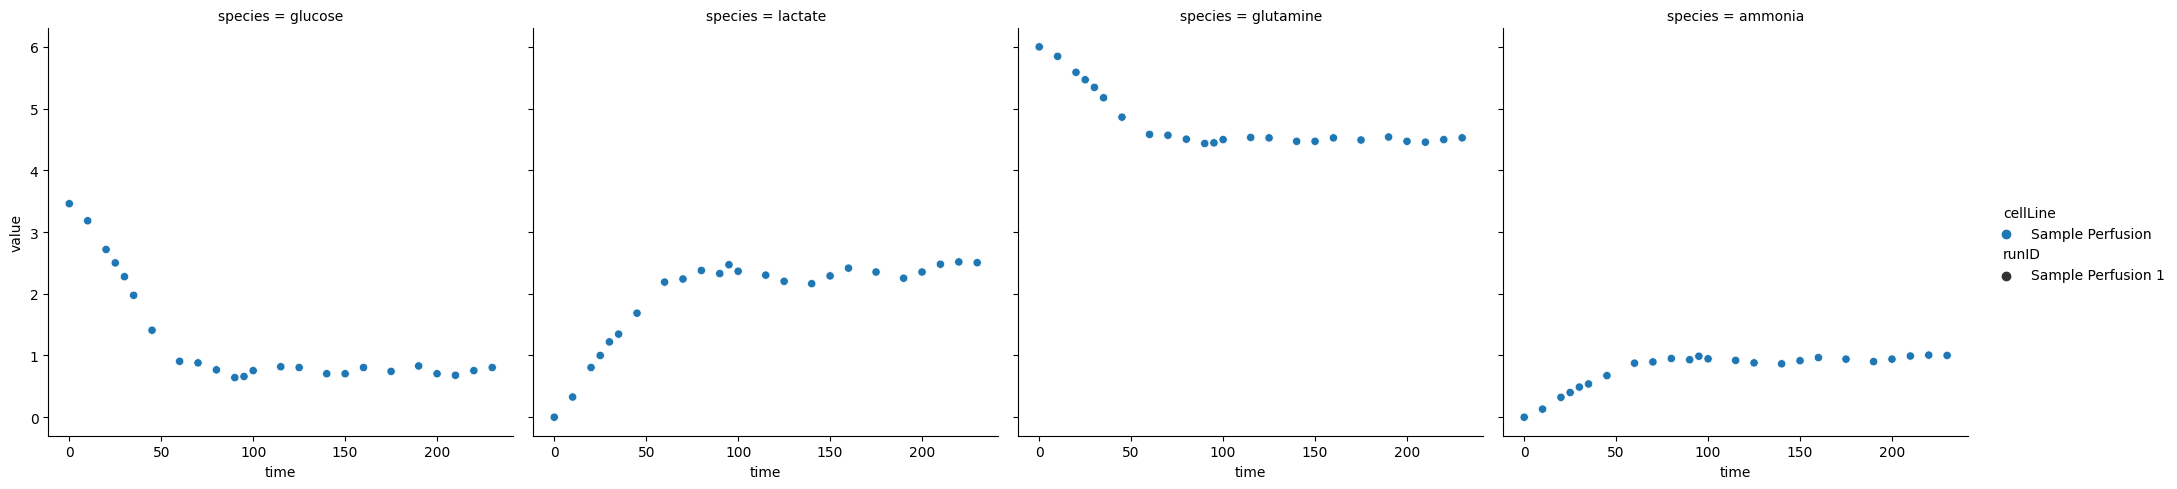

In [15]:
sns.relplot(data=df, x='time', y='value', kind='scatter',
            hue='cellLine', style='runID', 
            col='species',
            )
plt.show()